In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
from scipy.stats import chi2

In [75]:
# Função para gerar duas espirais
def gerar_espirais(n_points=500, ruido=0.5):
    n = np.sqrt(np.random.rand(n_points)) * 780 * (2 * np.pi)/360
    d1x = -np.cos(n) * n + np.random.rand(n_points) * ruido
    d1y = np.sin(n) * n + np.random.rand(n_points) * ruido
    X1 = np.vstack((d1x, d1y)).T
    y1 = np.zeros(n_points)

    d2x = np.cos(n) * n + np.random.rand(n_points) * ruido
    d2y = -np.sin(n) * n + np.random.rand(n_points) * ruido
    X2 = np.vstack((d2x, d2y)).T
    y2 = np.ones(n_points)

    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2)).astype(int)
    return X, y

In [76]:
def plot_gaussian_ellipse(mean, cov, ax, color):
    # Usamos a distância qui-quadrado para 95% de confiança (~2.4477 desvios para 2D)
    v, w = np.linalg.eigh(cov)
    order = v.argsort()[::-1]
    v, w = v[order], w[:, order]
    angle = np.degrees(np.arctan2(w[1, 0], w[0, 0]))
    width, height = 2 * np.sqrt(chi2.ppf(0.95, 2) * v)

    ellipse = patches.Ellipse(xy=mean, width=width, height=height, angle=angle,
                              edgecolor=color, facecolor='none', linewidth=2, alpha=0.6)
    ax.add_patch(ellipse)

In [77]:
# 1. Gerar os dados em espiral
X, y = gerar_espirais(n_points=500, ruido=0.5)

# 2. Validação cruzada com 10 folds
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []

# 3. Treinar e testar com GMM + classificador Bayes
for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    gmms = {}
    for class_label in np.unique(y_train):
        gmm = GaussianMixture(n_components=30, covariance_type='full', random_state=42)
        gmm.fit(X_train[y_train == class_label])
        gmms[class_label] = gmm

    log_probs = np.zeros((X_test.shape[0], len(gmms)))
    for class_label, gmm in gmms.items():
        log_probs[:, class_label] = gmm.score_samples(X_test)
    
    y_pred = np.argmax(log_probs, axis=1)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Fold {fold_idx+1}: Acurácia = {acc:.4f}")

# 4. Acurácia média e desvio padrão
mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)
print(f"\nAcurácia média: {mean_acc:.4f}")
print(f"Desvio padrão: {std_acc:.4f}")

# 5. Superfície de separação
h = 0.1
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

# Re-treinar GMMs nos dados inteiros para visualização
gmms = {}
for class_label in np.unique(y):
    gmm = GaussianMixture(n_components=30, covariance_type='full', random_state=42)
    gmm.fit(X[y == class_label])
    gmms[class_label] = gmm

log_probs = np.zeros((grid.shape[0], len(gmms)))
for class_label, gmm in gmms.items():
    log_probs[:, class_label] = gmm.score_samples(grid)

Z = np.argmax(log_probs, axis=1).reshape(xx.shape)

# Plot
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ['red', 'blue']

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Fold 1: Acurácia = 1.0000


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Fold 2: Acurácia = 1.0000


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Fold 3: Acurácia = 1.0000


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Fold 4: Acurácia = 1.0000


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Fold 5: Acurácia = 1.0000


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Fold 6: Acurácia = 1.0000


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Fold 7: Acurácia = 1.0000


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Fold 8: Acurácia = 1.0000


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Fold 9: Acurácia = 1.0000


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Fold 10: Acurácia = 1.0000

Acurácia média: 1.0000
Desvio padrão: 0.0000


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


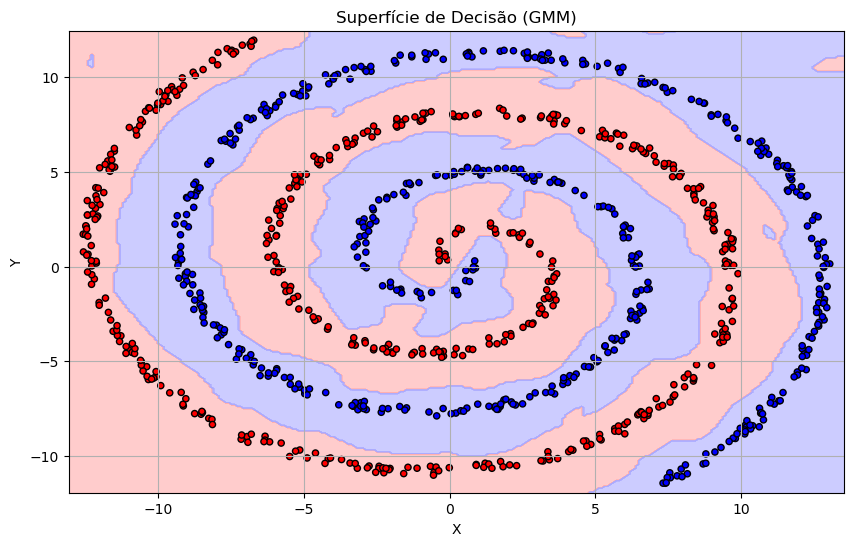

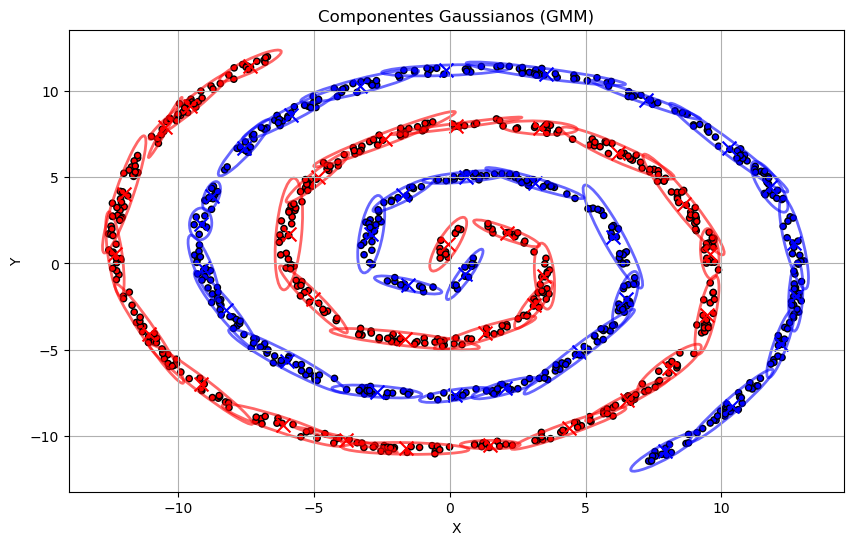

In [78]:
# %%
# 1º gráfico: Superfície de separação
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=20)
plt.title("Superfície de Decisão (GMM)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

# %%
# 2º gráfico: Gaussianas + centros
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=20)

colors = ['red', 'blue']
for class_label, gmm in gmms.items():
    means = gmm.means_
    covariances = gmm.covariances_
    for i in range(gmm.n_components):
        plot_gaussian_ellipse(means[i], covariances[i], plt.gca(), color=colors[class_label])
        plt.scatter(*means[i], c=colors[class_label], marker='x', s=100)

plt.title("Componentes Gaussianos (GMM)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


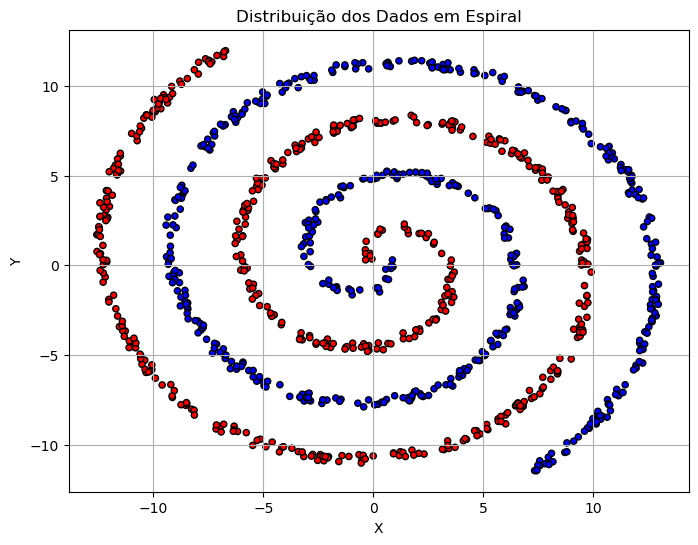

In [79]:
# %%
# Visualizar apenas os dados gerados
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'blue']), edgecolor='k', s=20)
plt.title("Distribuição dos Dados em Espiral")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()
